In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [3]:
import pandas as pd
df = pd.read_csv(r"<file_path>.csv", encoding = 'utf-8')
df.head(10)

,sIP,dIP,sPort,dPort,proto,packets,bytes,flags,duration
0,3232249961,3232249960,33968,443,6,7,919,27,0.122
1,3232249960,3232249961,443,33968,6,4,1766,27,0.121
2,3232249961,3232249960,33970,443,6,7,919,27,0.120
3,3232249960,3232249961,443,33970,6,4,1766,27,0.118
4,3232249961,3232249960,33972,443,6,7,919,27,0.005
5,3232249960,3232249961,443,33972,6,4,1766,27,0.005
6,3232249961,3232249960,33974,443,6,7,919,27,0.006
7,3232249960,3232249961,443,33974,6,4,1766,27,0.006
8,3232249961,3232249960,33978,443,6,6,905,27,0.008
9,3232249960,3232249961,443,33978,6,5,508,27,0.008


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

,sIP,dIP,sPort,dPort,proto,packets,bytes,flags,duration
0,0.985036,-0.105907,0.984879,-1.017462,-0.117377,-0.003700,-0.122527,0.190598,-0.101340
1,-0.930794,-0.105907,-0.974698,0.960746,-0.117377,-0.185224,-0.066421,0.190598,-0.101392
2,0.985036,-0.105907,0.984996,-1.017462,-0.117377,-0.003700,-0.122527,0.190598,-0.101444
3,-0.930794,-0.105907,-0.974698,0.960864,-0.117377,-0.185224,-0.066421,0.190598,-0.101549
4,0.985036,-0.105907,0.985113,-1.017462,-0.117377,-0.003700,-0.122527,0.190598,-0.107441


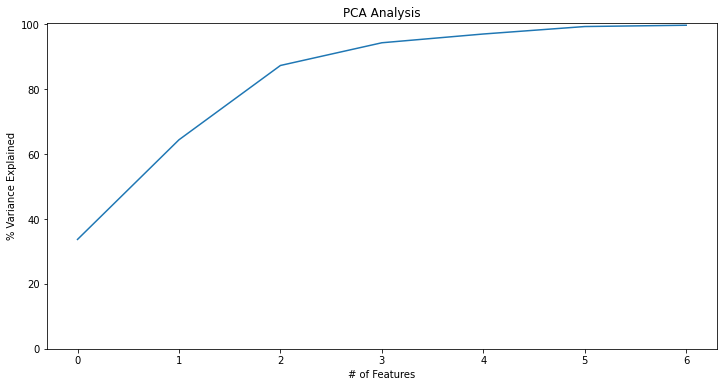

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=7)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [6]:
pca = PCA(n_components=3)
pca.fit(df_scale)
pca_scale = pca.transform(df_scale)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3'])
print(pca.explained_variance_ratio_)

[0.33741846 0.30705423 0.2294972 ]


In [7]:
from itertools import product
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

pca_eps_values = np.arange(0.2,1.5,0.1) 
pca_min_samples = np.arange(2,5) 
pca_dbscan_params = list(product(pca_eps_values, pca_min_samples))

pca_no_of_clusters = []
pca_sil_score = []
pca_epsvalues = []
pca_min_samp = []

for p in pca_dbscan_params:
    pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(pca_df)
    pca_epsvalues.append(p[0])
    pca_min_samp.append(p[1])
    pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
    pca_sil_score.append(silhouette_score(pca_df, pca_dbscan_cluster.labels_))

pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])
pca_eps_min_df

,no_of_clusters,silhouette_score,epsilon_values,minimum_points
0,10,0.961826,0.2,2
1,7,0.957269,0.2,3
2,5,0.957232,0.2,4
3,8,0.965517,0.3,2
4,7,0.967117,0.3,3
5,5,0.965007,0.3,4
6,9,0.964009,0.4,2
7,7,0.967117,0.4,3
8,6,0.962677,0.4,4
9,9,0.966144,0.5,2


In [8]:
db = DBSCAN(eps=1.0, min_samples=4).fit(pca_df)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(pca_df, labels))


Estimated number of clusters: 6
Estimated number of noise points: 8
Silhouette Coefficient: 0.975


In [9]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5}

In [10]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([  8, 417, 417,   4,   4,  25,   8], dtype=int64))

In [11]:
df["Cluster"]=labels
df.tail(10)

,sIP,dIP,sPort,dPort,proto,packets,bytes,flags,duration,Cluster
873,3232249960,3232249961,443,34578,6,1,52,16,0.000,4
874,3232249960,3232249961,443,34594,6,1,52,16,0.000,4
875,3232249960,3232249961,443,34602,6,1,52,16,0.000,4
876,3232249961,4026531834,45313,1900,17,4,780,0,3.028,5
877,3232249961,4026531834,52313,1900,17,4,780,0,3.003,5
878,3232249960,3758096635,5353,5353,17,2,146,0,255.961,-1
879,3232249960,3232249961,443,34684,6,1,52,16,0.000,4
880,3232249961,3232249956,68,67,17,2,620,0,300.021,-1
881,3232249956,3232249961,67,68,17,2,1152,0,299.996,-1
882,3232249961,4026531834,40692,1900,17,4,780,0,3.009,5
